## Projekt - Chemisches Rauschen

Als naechstes soll eine Reaktion mit dynamischer Instabilitaet untersucht werden, das sogenannte
Brusselatormodell. Dieses wird durch die folgenden Reaktionen beschrieben :

$$
\begin{eqnarray}
R_0 &:& X_0 \to X_0 + Y_0 \\
R_1 &:& X_1 + Y_0\to X_1 + Y_1 + Z_0 \\
R_2 &:& 2Y_0 + Y_1 \to 3Y_0\\
R_3 &:& Y_0 \to Z_1
\end{eqnarray}
$$

Teilchen der Sorte $X_i$ bilden die Resourcen der chemischen Reaktion. Da die Resourcen
waehrend der Reaktion konstant gehalten werden sollen, haben wir die rechten Seiten der
Reaktionen $R_0$ und $R_1$ einfach ergaenzt. In Reaktion $R_0$ bedeutet dies z.B., dass jedesmal
wenn ein Teilchen $X_0$ in $Y_0$ umgewandelt wird, ein weiteres Teilchen $X_0$ dem System hinzugegeben
wird. Die Konzentrationen der Endprodukte $Z_i$ sind fuer die Uebergangsraten und die Konzentrationen der uns interessierenden Zwischenprodukte $Y_i$ nicht relevant.

- Schreiben Sie zunaechst mit Hilfe der chemischen Reaktionsraten $k_i$ die Differentialgleichungen
fuer die Konzentrationen $y_0$ und $y_1$ der Teilchen $Y_0$ und $Y_1$ auf. 
- Druecken Sie nun die Konzentration durch Teilchenzahl und Volumen aus, und bestimmen Sie die Uebergangsraten
$r_i\left(\vec{N} ,\vec{k}, V \right)$ im System. Im Originalpapier von Gillespie [2] werden die Systemparameter
$\gamma_0 = k_0N_{X_0} = 5000s^{−1}$, $\gamma_1 = k_1N_{X_1}/V = 50s^{−1}$, $\gamma_2 = k_2/V^2 = 5 × 10^{−5}s^{−1}$ und $\gamma_3 = k_3 = 5s^{−1}$ verwendet, wodurch die Uebergangsraten auch als $r_i\left(\vec{N} ,\vec{\gamma}\right)$ geschrieben werden koennen.
- Simulieren Sie das stochastische System von chemischen Reaktionen fuer $N_{Y_0}(t = 0) = 1000$
und $N_{Y_1}(t = 0) = 2000$ fuer $2×10^6$ Reaktionsuebergaenge und plotten Sie $N_{Y_1}$ gegen $N_{Y_2}$ , sowie
jeweils $N_{Y_1}(t_n)$ und $N_{Y_2}(t_n)$ nach den Reaktionszeitpunkten $t_n$ fuer $0s < t_n < 14s$.

In [1]:
import numpy as np
%matplotlib inline
from pylab import *

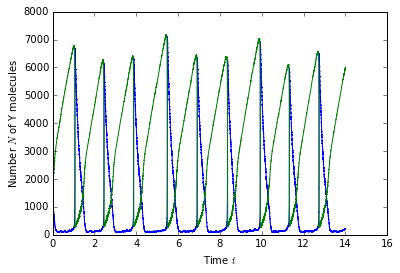

In [9]:
nX00 = nY00 = 1000
nX10 = nY10 = 2000
nZ00 = 0
nZ10 = 0
gamma0 = 5000
gamma1 = 50
gamma2 = 5 * 10**(-5)
gamma3 = 5

gamma = np.array([gamma0, gamma1, gamma2, gamma3])
V = 1
n0 = np.array([nX00, nX10, nY00, nY10, nZ00, nZ10])

nu0 = np.array([0, 0, +1, +0, 0, 0])
nu1 = np.array([0, 0, -1, +1, 0, 0])
nu2 = np.array([0, 0, +1, -1, 0, 0])
nu3 = np.array([0, 0, -1, +0, 0, 0])
nu = [nu0, nu1, nu2, nu3]
t_max = 14

def calculate_r(n, gamma, V):
    r0 = gamma[0] 
    r1 = gamma[1]  * n[2]
    r2 = gamma[2]  * (n[2]-1)/2 * n[2] * n[3]
    r3 = gamma[3]  * n[2]
    r = [r0, r1, r2, r3]
    return r

def reaction(V, n0, nu, gamma, t_max):
    t = 0
    n = n0

    while t < t_max:
        r = calculate_r(n, gamma, V)
        r_tot = sum(r)
        dt = np.random.exponential(scale=1/r_tot) 
        t = t + dt
        i = np.random.rand()
        i = np.argmax(i<np.cumsum(r)/r_tot)
        n = n + nu[i]
        yield t, n
        
t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Time $t$")
ylabel("Number $N$ of Y molecules")   
plot(t, n[2], label="Simulation $y_0$")
plot(t, n[3], 'g', label="Simulation $y_1$")

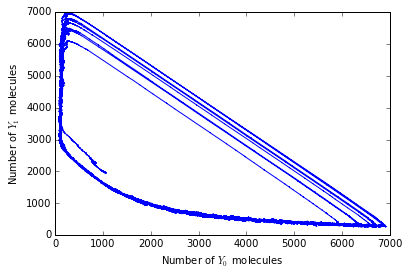

In [15]:
plot(n[2], n[3])
xlabel("Number of $Y_0$ molecules")
ylabel("Number of $Y_1$ molecules")   

Nun fuehren wir neue Systemparameter ein. Neben dem Volumen V
betrachten wir auch die inverse Konzentration $\alpha = \frac{2k_3}{k_1x_1}$
der Resource $X_1$ sowie das Verhaeltnis $p = \frac{k_2k_0^2 x_0^2}{k_3^2 k_1x_1}$. 
- Wie lauten $\alpha$ und $p$ als Funktionen von $\gamma_0$, $\gamma_1$, $\gamma_2$ und $\gamma_3$? Wie lauten $\gamma_0$ und $\gamma_1$ als Funktionen von $\alpha$, $p$, $\gamma_2$ und $\gamma_3$? 

Haelt man $\alpha$ und $p$ konstant, so aendern sich mit dem Volumen nur die Teilchenzahlen, aber nicht die Konzentrationen. Haelt man hingegen $V$ und $p$
konstant, so durchlaeuft das System eine sogenannte Hopf-Bifurkation bei $\alpha = 2(1 − p)$. Fuer
kleinere Werte exisitert ein stabiles Gleichgewicht und fuer groeßere Werte faengt das System
an, um dieses Gleichgewicht zu oszillieren. 
- Ausgehend von den Werten $\gamma_0 \dots \gamma_3$ im Artikel [2],
Simulieren Sie das stochastische System bei konstanten $p$, $\gamma_2$ und $\gamma_3$ fuer verschiedene Werte
von $\alpha$ und beschreiben Sie Ihre Beobachtungen. 
- Fuer $\alpha = 0.5$ halten Sie nun $\alpha$, $p$, $\gamma_1$ und $\gamma_3$ konstant und veraendern Sie das Volumen $V$ indem Sie es mit einem Faktor $0 < \mu < 1$ multiplizieren. Was beobachten Sie fuer kleine $\mu$? (Verwenden Sie die Groessen $N_Y /\mu$ in den entsprechenden Plots). 

**Zusatzaufgabe :** 
- Zeigen Sie, dass $p = y_0^*/y_1^*$ gleich dem Verhaeltnis der Gleichgewichtskonzentrationen der Stoffe $Y_0$ und $Y_1$ ist. Im Gleichgewicht sind die Zeitableitungen Null. 
- Loesen sie das System von Differentialgleichungen fuer die mittleren Teilchenzahlen numerisch (z.B. mit Hilfe der Euler-Methode) bei ausgewaehlten Parametern, und vergleichen Sie diese deterministische Simulation
mit einer stochastischen Simulation mit denselben Parametern.

**Zusatzaufgabe :** 
- Entwerfen Sie eine Python Datenstruktur, welche beliebige Systeme von Reaktionen beschreiben kann und schreiben Sie Funktionen, welche diese Reaktionen fuer gegebene Teilchenanzahlen simulieren und die Simulationsergebnisse grafisch ausgeben koennen.

In [16]:
def gamma(alpha):
    gamma2 = 5 * 10**(-5)
    gamma3 = 5
    gamma0 = np.sqrt(2*1*gamma3**3/(alpha*V**2*gamma2)) 
    gamma1 = 2*gamma3/(alpha*V)    
    gamma = np.array([gamma0, gamma1, gamma2, gamma3])
    return gamma

def reaction2(V, n0, nu, t_max, alpha):
    t = 0
    n = n0
    gammar = gamma(alpha)

    while t < t_max:
        r = calculate_r(n, gammar, V)
        r_tot = sum(r)
        dt = np.random.exponential(scale=1/r_tot)        
        t = t + dt
        i = np.random.rand()
        i = np.argmax(i<np.cumsum(r)/r_tot)
        n = n + nu[i]
        yield t, n 

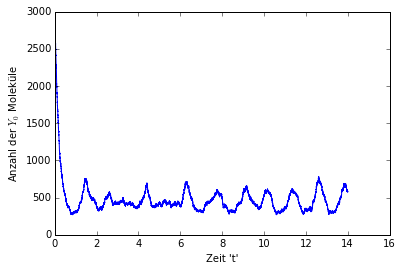

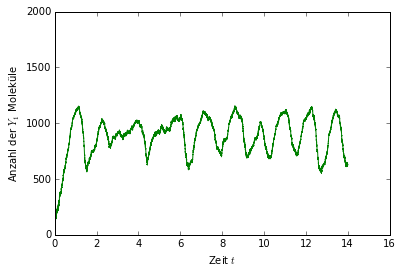

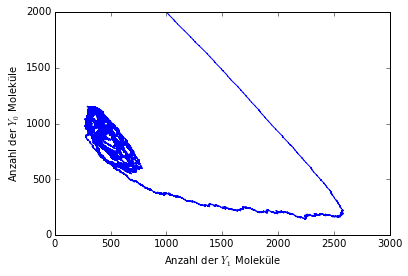

In [19]:
t, n = zip(*list(reaction2(V, n0, nu, t_max, 1))) #alpha = 1
n = np.array(n).T
t = np.array(t)

plt.figure(1)
xlabel("Zeit 't'")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(t, n[2])
savefig("alpha11.pdf")
plt.figure(2)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_1$ Moleküle")
plt.plot(t, n[3], 'g')
savefig("alpha12.pdf")
plt.figure(3)
xlabel("Anzahl der $Y_1$ Moleküle")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(n[2], n[3])
savefig("alpha13.pdf")
plt.show()

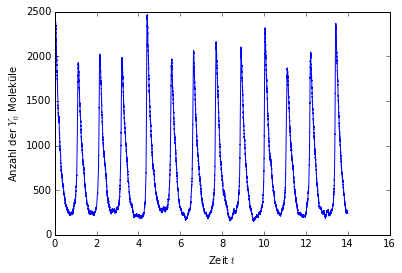

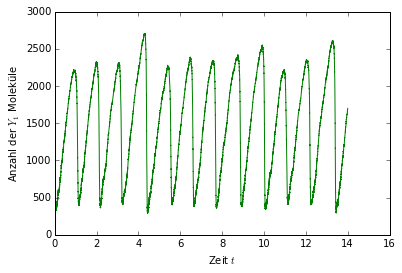

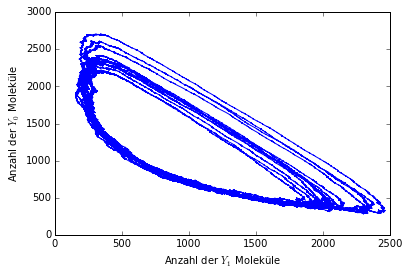

In [20]:
t, n = zip(*list(reaction2(V, n0, nu, t_max, 0.5))) #alpha = 0.5
n = np.array(n).T
t = np.array(t).T

plt.figure(1)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(t, n[2])
savefig("alpha051.pdf")
plt.figure(2)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_1$ Moleküle")
plt.plot(t, n[3], 'g')
savefig("alpha052.pdf")
plt.figure(3)
xlabel("Anzahl der $Y_1$ Moleküle")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(n[2], n[3])
savefig("alpha053.pdf")
plt.show()

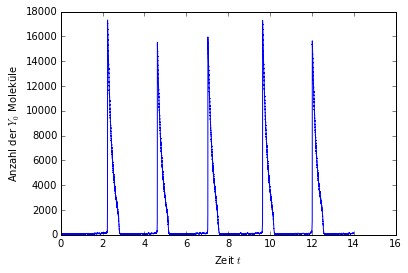

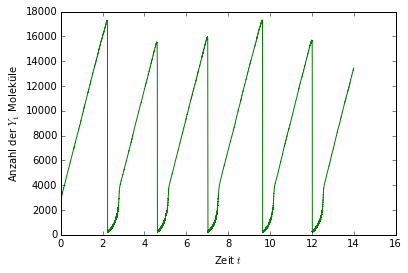

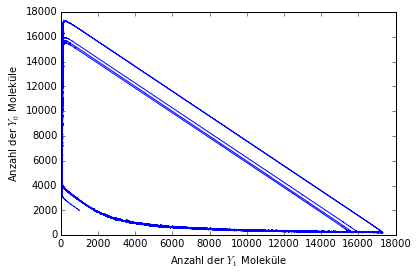

In [21]:
t, n = zip(*list(reaction2(V, n0, nu, t_max, 0.1))) #alpha = 0.1
n = np.array(n).T
t = np.array(t).T

plt.figure(1)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(t, n[2])
savefig("alpha011.pdf")
plt.figure(2)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_1$ Moleküle")
plt.plot(t, n[3], 'g')
savefig("alpha012.pdf")
plt.figure(3)
xlabel("Anzahl der $Y_1$ Moleküle")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(n[2], n[3])
savefig("alpha013.pdf")
plt.show()

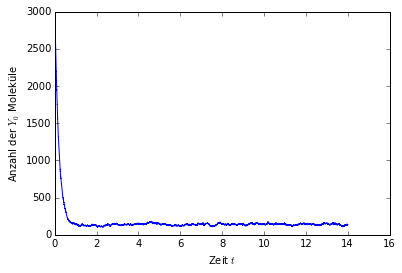

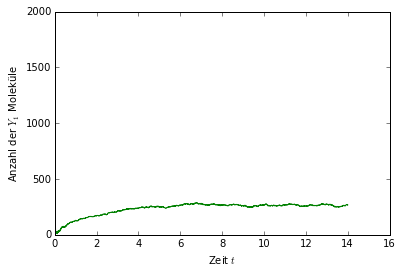

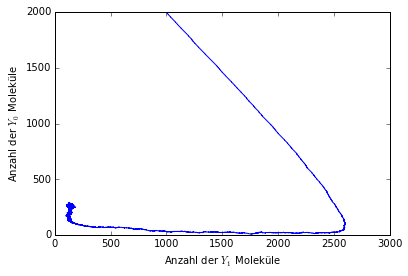

In [22]:
t, n = zip(*list(reaction2(V, n0, nu, t_max, 10))) #alpha = 10
n = np.array(n).T
t = np.array(t)

plt.figure(1)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(t, n[2])
savefig("alpha101.pdf")
plt.figure(2)
xlabel("Zeit $t$")
ylabel("Anzahl der $Y_1$ Moleküle")
plt.plot(t, n[3], 'g')
savefig("alpha102.pdf")
plt.figure(3)
xlabel("Anzahl der $Y_1$ Moleküle")
ylabel("Anzahl der $Y_0$ Moleküle")
plt.plot(n[2], n[3])
savefig("alpha103.pdf")
plt.show()

- Fuer $\alpha = 0.5$ halten Sie nun $\alpha$, $p$, $\gamma_1$ und $\gamma_3$ konstant und veraendern Sie das Volumen $V$ indem Sie es mit einem Faktor $0 < \mu < 1$ multiplizieren. Was beobachten Sie fuer kleine $\mu$? (Verwenden Sie die Groessen $N_Y /\mu$ in den entsprechenden Plots). 

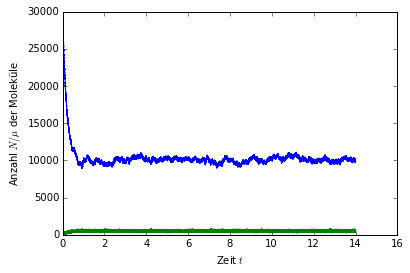

In [16]:
alpha = 0.5
mu = 0.1

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = n0[2] * gamma3
gamma2 = (4*gamma3)/(alpha*n0[2]*n0[3]*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])


t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu01.pdf')

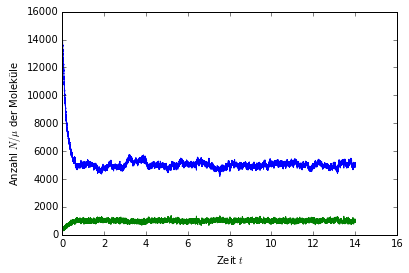

In [15]:
alpha = 0.5
mu = 0.2

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu02.pdf')

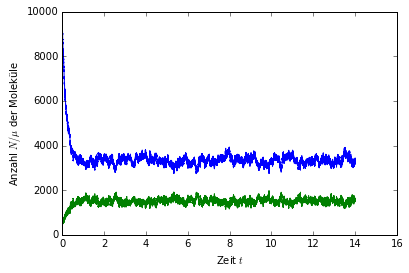

In [14]:
alpha = 0.5
mu = 0.3

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu03.pdf')

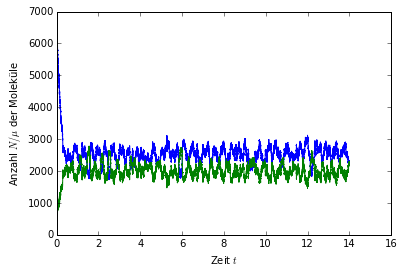

In [13]:
alpha = 0.5
mu = 0.4

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu04.pdf')

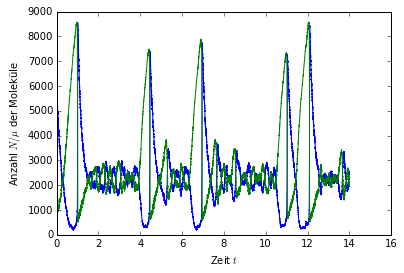

In [10]:
alpha = 0.5
mu = 0.45

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu045.pdf')

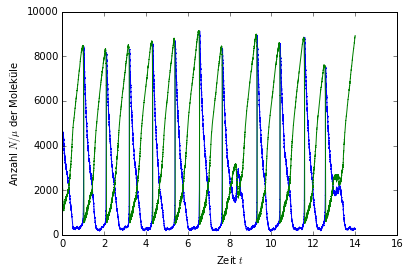

In [11]:
alpha = 0.5
mu = 0.5

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu05.pdf')

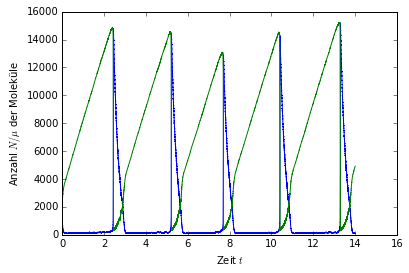

In [4]:
alpha = 0.5
mu = 0.9

V = 1 * mu
gamma1 = 50
gamma3 = 5
gamma0 = nY00 * gamma3
gamma2 = (4*gamma3)/(alpha*nY00*nY10*V**2)
gamma = np.array([gamma0, gamma1, gamma2, gamma3])

t, n = zip(*list(reaction(V, n0, nu, gamma, t_max)))
n = np.array(n).T
t = np.array(t)
xlabel("Zeit $t$")
ylabel("Anzahl $N/\mu$ der Moleküle")
plot(t, n[2]/mu, label="Simulation $y_0$")
plot(t, n[3]/mu, label="Simulation $y_1$")
savefig('mu09.pdf')